In [2]:
import sys
import numpy 
import pandas
import sklearn
import matplotlib

In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#load the dataset
#names gives the name of columns which are to be used
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url,names=names)

In [5]:
#preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],axis=1,inplace = True)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [6]:
#Returns the sum of null values
df.isnull().sum()

clump                     0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [7]:
#Do dataset visualisations
print(df.loc[698])
print(df.describe())

clump                      4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
            clump  uniform_cell_size  uniform_cell_shape  marginal_adhesion  \
count  699.000000         699.000000          699.000000         699.000000   
mean     4.417740           3.134478            3.207439           2.806867   
std      2.815741           3.051459            2.971913           2.855379   
min      1.000000           1.000000            1.000000           1.000000   
25%      2.000000           1.000000            1.000000           1.000000   
50%      4.000000           1.000000            1.000000           1.000000   
75%      6.000000           5.000000            5.000000           4.000000   
max     10.000000          10.000000           10.000

In [8]:
corr_matrix = df.corr()
print(corr_matrix)

                           clump  uniform_cell_size  uniform_cell_shape  \
clump                   1.000000           0.644913            0.654589   
uniform_cell_size       0.644913           1.000000            0.906882   
uniform_cell_shape      0.654589           0.906882            1.000000   
marginal_adhesion       0.486356           0.705582            0.683079   
single_epithelial_size  0.521816           0.751799            0.719668   
bland_chromatin         0.558428           0.755721            0.735948   
normal_nucleoli         0.535835           0.722865            0.719446   
mitoses                 0.350034           0.458693            0.438911   
class                   0.716001           0.817904            0.818934   

                        marginal_adhesion  single_epithelial_size  \
clump                            0.486356                0.521816   
uniform_cell_size                0.705582                0.751799   
uniform_cell_shape               0.683079 

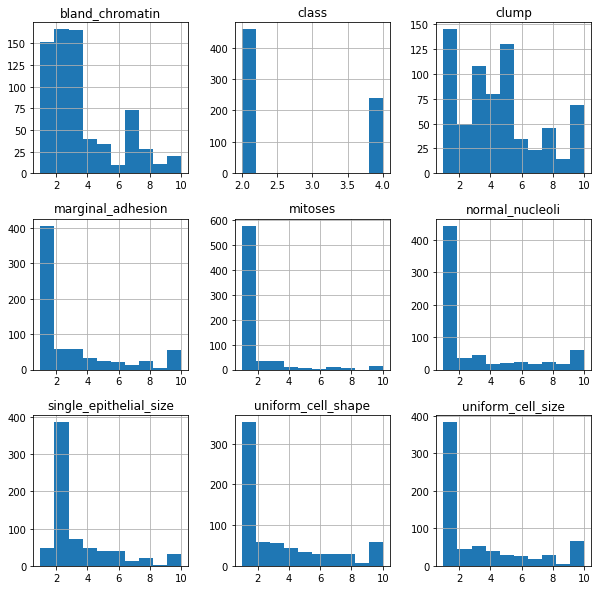

In [9]:
#Plot Histograms For Each Variable
df.hist(figsize=(10,10))
plt.show()

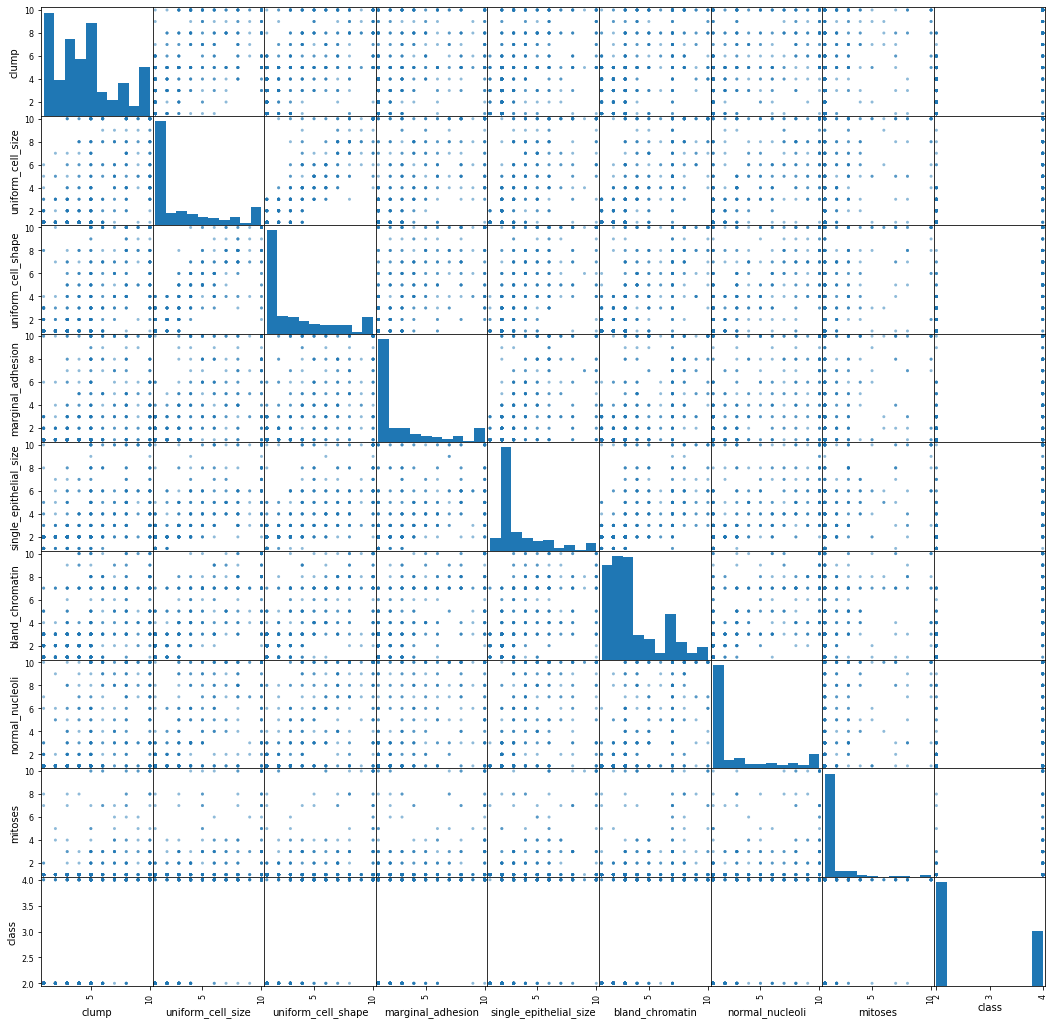

In [11]:
#Create Scatter Plot Matrix, this helps determine if linear or nonlinear algorithm should be used
scatter_matrix(df,figsize=(18,18))
plt.show()

In [12]:
#create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [13]:
#specify testing options
seed = 8
scoring = 'accuracy'

In [14]:
#Define the models to train
models = []
names = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=50)))
models.append(('SVM',SVC()))

#Evaluate each model in turn
results = []
names = []

for name,model in models :
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring = scoring)
    names.append(name)
    msg = "%s : %f, (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    


KNN : 0.955325, (0.021463)
SVM : 0.953409, (0.024513)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

In [15]:
#Making Predictions
for name,model in models :
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))
    

KNN
0.9642857142857143
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        87
           4       0.98      0.92      0.95        53

    accuracy                           0.96       140
   macro avg       0.97      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM
0.9785714285714285
              precision    recall  f1-score   support

           2       1.00      0.97      0.98        87
           4       0.95      1.00      0.97        53

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
